<a href="https://colab.research.google.com/github/physicaone/loss_IG/blob/master/%5B210814%5Dvisual_exact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base='drive/MyDrive'
except:
    base='Google Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [82]:
n_hid_list=[1, 2, 3, 4, 5, 6, 8, 10, 12, 16]
T_list=[1.47, 1.78, 2.3, 5.2, 16]
T_color=['red', 'orange', 'green', 'blue', 'purple']
n_hid_color=['red', 'orange', 'yellow', 'green', 'skyblue','blue', 'purple']
re=''

In [83]:
Bias={}
for T in T_list:
    Bias[str(T)]=[]
    for n_hid in n_hid_list:
        try:
            Bias[str(T)].append(np.min(pd.read_pickle('{base}/loss_IG/3*3/train_error/loss_n_hid={n_hid}_T={T}.pkl'.format(base=base, n_hid=n_hid, T=T))))
            # Bias[str(T)].append(pd.read_pickle('{base}/loss_IG/3*3/train_error/loss_n_hid={n_hid}_T={T}.pkl'.format(base=base, n_hid=n_hid, T=T))[-1])
        except:
            Bias[str(T)].append(None)

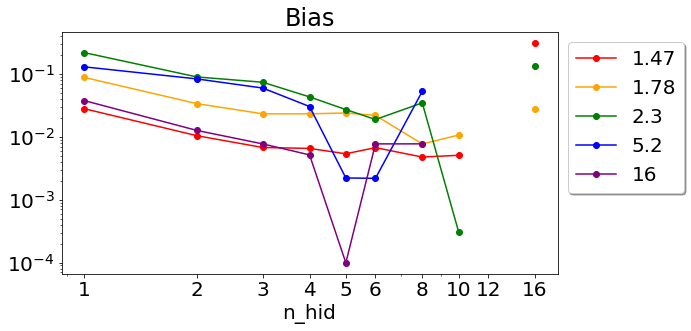

In [84]:
x_mark=n_hid_list
# y_mark=[0.001, 0.01, 0.1, 0.4]

plt.figure(figsize=(10,5))
alpha=0.5
# plt.subplot(1, 3, 1)
plt.rcParams["font.size"] = "20"
plt.title('Bias{re}'.format(re=re))
plt.xscale('log')
plt.xlabel('n_hid')
# plt.ylim(y_mark[0],y_mark[-1])

plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, Bias[str(T_list[i])], '-o', c=T_color[i], label = T_list[i])

plt.xticks(x_mark,x_mark)
plt.legend(T_list,  bbox_to_anchor=(1, 1), 
        ncol=1, fancybox=True, shadow=True)
# plt.yticks(y_mark, y_mark)

In [75]:
n_hid_list=[1,2,4,8,16]
T_list=[1.47, 1.78, 2.3, 5.2, 16]
epoch_to_save=[1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]
T_color=['red', 'orange', 'green', 'blue', 'purple']
n_hid_color=['red', 'orange', 'green', 'blue', 'purple']
lr=0.05

In [76]:
Train_loss={}
IG_loss={}
for T in T_list:
    Train_loss[str(T)]={}
    IG_loss[str(T)]={}
    for n_hid in n_hid_list:
        try:
            Train_loss[str(T)][str(n_hid)]=pd.read_pickle('{base}/loss_IG/3*3/loss/train_loss_n_hid={n_hid}_T={T}_lr={lr}_10.pkl'.format(base=base, n_hid=n_hid, T=T, lr=lr))
            IG_loss[str(T)][str(n_hid)]=pd.read_pickle('{base}/loss_IG/3*3/loss/IG_loss_n_hid={n_hid}_T={T}_lr={lr}_10.pkl'.format(base=base, n_hid=n_hid, T=T, lr=lr))
        except:
            Train_loss[str(T)][str(n_hid)]=None
            IG_loss[str(T)][str(n_hid)]=None

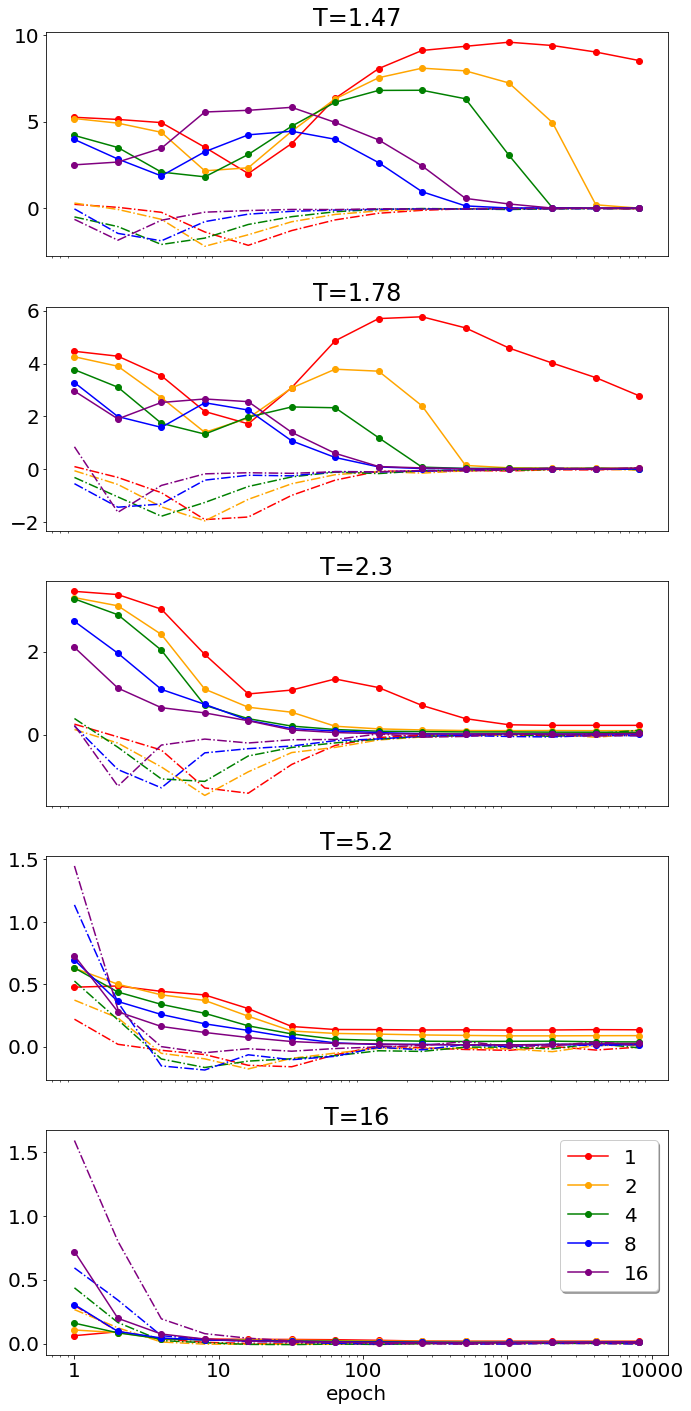

In [78]:
x_mark=[1,10,100,1000,10000]
# y_mark=[0.001, 0.01, 0.1, 0.4]

plt.figure(figsize=(10,20))

# plt.ylim(y_mark[0],y_mark[-1])
for j in range(len(T_list)):
    plt.subplot(len(T_list), 1, j+1)
    plt.title('T={T}'.format(T=T_list[j]))
    plt.rcParams["font.size"] = "20"
    plt.xscale('log')
    # plt.yscale('log')
    for i in range(len(n_hid_list)):
        try:
            plt.plot(epoch_to_save, Train_loss[str(T_list[j])][str(n_hid_list[i])], '-.', c=n_hid_color[i], label='_nolegend_')
            plt.plot(epoch_to_save, IG_loss[str(T_list[j])][str(n_hid_list[i])], '-o', c=n_hid_color[i], label = n_hid_list[i])


        except:None
        plt.xticks([])
plt.xticks(x_mark,x_mark)
# plt.yticks(y_mark, y_mark)
plt.xlabel('epoch')

plt.legend(n_hid_list, bbox_to_anchor=(1, 1), 
        ncol=1, fancybox=True, shadow=True)
